In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import multiprocessing
from collections import defaultdict
from nn import *
from matplotlib.ticker import ScalarFormatter
from functools import partial
np.random.seed(100)
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
# Load all the data
train_data, train_labels = read_data('./images_train.csv', './labels_train.csv')
train_labels = one_hot_labels(train_labels)
p = np.random.permutation(60000)
train_data = train_data[p,:]
train_labels = train_labels[p,:]

dev_data = train_data[0:10000,:]
dev_labels = train_labels[0:10000,:]
train_data = train_data[10000:,:]
train_labels = train_labels[10000:,:]

mean = np.mean(train_data)
std = np.std(train_data)
train_data = (train_data - mean) / std
dev_data = (dev_data - mean) / std

test_data, test_labels = read_data('./images_test.csv', './labels_test.csv')
test_labels = one_hot_labels(test_labels)
test_data = (test_data - mean) / std

all_data = {
    'train': train_data,
    'dev': dev_data,
    'test': test_data
}

all_labels = {
    'train': train_labels,
    'dev': dev_labels,
    'test': test_labels,
}

In [ ]:
# Search through learning rates
lrs = [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7]
results = {}
num_epochs = 20
plot = False

algos = ['LMS', '%LMS']

with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
    for i in range(2):
        algo_dict = defaultdict(list)
        for accuracy, cost_train, cost_dev, accuracy_train, accuracy_dev in pool.imap(partial(run_train_test, \
                    name=algos[i], all_data=all_data, all_labels=all_labels, backward_prop_func=backward_prop, \
                    num_epochs=num_epochs, plot=plot), lrs):
            algo_dict['Test Accuracy'].append(accuracy)
            algo_dict['Train Accuracy'].append(accuracy_train)
            algo_dict['Dev Accuracy'].append(accuracy_dev)
            algo_dict['Dev Loss'].append(cost_dev)
            algo_dict['Train Loss'].append(cost_train)
        results[algos[i]] = algo_dict

In [5]:
results

{'LMS': defaultdict(list,
             {'Test Accuracy': [0.871,
               0.9145,
               0.9221,
               0.9453,
               0.9591,
               0.957,
               0.9541,
               0.9341,
               0.8924,
               0.8865,
               0.8491,
               0.8571,
               0.8981,
               0.911,
               0.9375,
               0.9529,
               0.9601,
               0.9643,
               0.9643,
               0.9619,
               0.959,
               0.9488],
              'Train Accuracy': [0.89808,
               0.95486,
               0.97208,
               0.99532,
               0.98498,
               0.96618,
               0.96274,
               0.94342,
               0.89788,
               0.89,
               0.84888,
               0.87816,
               0.93932,
               0.96156,
               0.98698,
               0.99088,
               0.98196,
               0.98338,
       

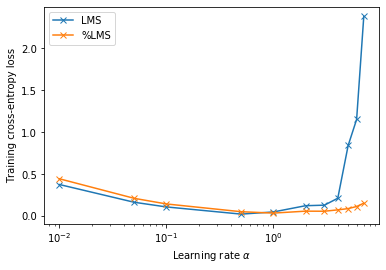

In [9]:
# Plot the training loss and plot the accuracy as a function of learning rates
fig, ax = plt.subplots()
for algo in algos:
    train_loss = results[algo]['Train Loss']
    plt.semilogx(lrs, train_loss, 'x-', label=algo)
plt.legend()
plt.xlabel(r'Learning rate $\alpha$')
plt.ylabel('Training cross-entropy loss')
plt.savefig('mnist_loss_lr.png', dpi=200)
# ax.xaxis.set_major_formatter(ScalarFormatter())

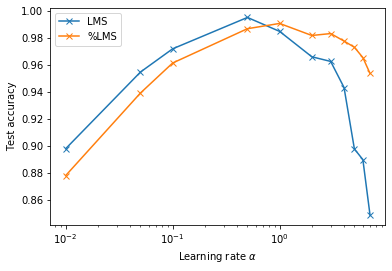

In [8]:
# Plot the accuracy as a function of learning rates
for algo in algos:
    train_accuracy = results[algo]['Test Accuracy']
    plt.semilogx(lrs, train_accuracy, 'x-', label=algo)
plt.legend()
plt.xlabel(r'Learning rate $\alpha$')
plt.ylabel('Test accuracy')
plt.savefig('mnist_acc_lr.png', dpi=200)